# Systems and Signals 414 Practical 1: Sampling of continuous-time signals

**Aim:** Exposure to sampled signals and their quirks, specifically (a) a periodic frequency representation,
and (b) the fact that the period of a sampled periodic signal is not necessarily the inverse of its frequency.

**Hand in:** Please hand in this notebook as a PDF file on SUNLearn by Sunday, 17 February 2019 at 23:55. To save your notebook to a PDF, you can  print the notebook from your browser and then choose to `Save as PDF`. (If you are doing the practical on a machine with LaTeX, you can also select `File`$\rightarrow$ `Download as` $\rightarrow$ `PDF via LaTeX (.pdf)` directly in the notebook.) After exporting your notebook, upload the PDF by clicking on `Practical 1 submission` on SUNLearn and following the steps. You may submit your work multiple times; only the last submission will be marked. **No late submissions will be accepted.**

**Task:** Do the following assignment using Jupyter. Document the task indicating your methodology, theoretical results, numerical results and discussions as necessary. Your graphs should have labeled axes with the correct units indicated. If you get stuck with a Numpy or Scipy function, go look up the usage at https://docs.scipy.org. Also take a look at the provided coding examples.

**Preamble code and helper functions:**

In [2]:
#All the necessary imports
%matplotlib inline
import pylab as pl
import numpy as np
from scipy import signal
import IPython.display

pl.rcParams['figure.figsize'] = (9,3)


def setup_plot(title, y_label='', x_label='', newfig=True):
    """Setup a proper plot."""
    if newfig:
        pl.figure()
    pl.margins(*(pl.array(pl.margins())+0.05))
    pl.title(title)
    pl.ylabel(y_label)
    pl.xlabel(x_label)

    
def add_top_axis(x_values, x_label=''):
    """Plot an additional x-axis at the top."""
    _, b = pl.rcParams['figure.figsize']
    pl.gca().title.set_position([.5, 1.18])
    ax1 = pl.gca()
    ax2 = ax1.twiny()
    ax2.margins(*(pl.array(ax1.margins())))
    ln, = ax2.plot(x_values, np.zeros_like(x_values)) # Create a dummy plot
    ln.remove()
    ax2.set_xlabel(x_label)

    
def download_and_load_audio(url, mono=True, factor_of_2_length=True):
    """Open or download audio and return it as an array."""
    import os
    import urllib
    import scipy.io
    from scipy.io import wavfile
    
    filename = os.path.split(url)[-1]
    #Download if path does not already exist
    if not os.path.isfile(filename):
        urllib.request.urlretrieve(url, filename)
    sample_frequency, signal_array = wavfile.read(filename)
    #Normalise signal and return
    if mono and len(signal_array.shape)==2:
        signal_array = np.sum(signal_array, axis=1)
    signal_array = signal_array/np.max([np.max(signal_array), -np.min(signal_array)])
    if factor_of_2_length:
        signal_array = signal_array[:2**np.floor(np.log2(len(signal_array))).astype('int')]
    
    return sample_frequency, signal_array

**Hints:** Plot “continuous-time” signals with Matplotlib's `plot` function, and discrete-time signals with `stem` instead. For example `pl.plot(np.arange(10))` and `pl.stem(np.arange(10))`.

Have you ever wondered why [$\pi$ feels so awkward](https://www.youtube.com/watch?v=2hhjsSN-AiU)? Join the [“one revolution”](http://tauday.com/tau-manifesto).

## Questions


### Question 1
**1.1)** Plot (using `pl.plot`) the continuous-time signal $$x(t)=20\sin(100 \cdot 2 \pi t)$$ on a time-axis from $0$ to $0.02$ seconds. Plot enough points to make the signal appear continuous.<br>**Applicable** `np.sin`, `np.linspace`, `setup_plot`, and `pl.plot`.

**1.2)** Given a sampling frequency of $f_s = 2000\,{\rm Hz}$, plot (using `pl.stem`) the first 40 samples, $n = 0, 1, \ldots, 39$, for the discrete-time signal $x[n]$, as sampled from a continuous-time signal
$$x(t)=20\sin(100 \cdot 2 \pi t).$$
The bottom axis should be in seconds (corresponding to the original continuous-time signal) and the top axis should be in samples. A limitation of `add_top_axis` is that it should only be used after calling `pl.plot` or `pl.stem`. Note that the time information is not inherently present in a discrete-time signal and isn't always known.<br>**Applicable**  `np.sin`, `np.linspace` and/or `np.range`, `setup_plot`, `pl.plot`, `add_top_axis`.

**1.3)** Repeat Question 1.2, for continuous-time signals of different frequencies. Use the function $$x(t)=20\sin(F \cdot 2 \pi t)$$ evaluated at different frequencies $$F = 0, 100, 900, 1000, 1100, 1900, 2000,\ {\rm and}\ 
2100\,{\rm Hz}.$$ The frequency of the sinusoid must appear in the plot title. For displaying purposes, it might be useful to set any value of $-10^{-10} <x[n]<10^{-10}$ equal to zero (hint: `x[(x>-1e-10) * (x<1e-10)] = 0`). For each of the signals, explain your
observations; you can write this in a separate cell using Markdown.<br>**Applicable**  `np.sin`, `np.linspace` and/or `np.range`, `setup_plot`, `pl.plot`, `add_top_axis`.

**1.4)** How would you determine the digital frequency $f_\omega$ (cycles/sample) in the above cases? Verify your plots by determining the function $$x[n] = A \sin(f_\omega \cdot 2\pi n)$$ directly for one of the
above cases.

### Question 2

You probably would have wondered about the strange shape of the sampled $900\,{\rm Hz}$
signal in Question 1.3.
Sample this signal again, but this time let $$n = 0, . . . , 799\ \ {\rm and}\ \ f_s = 40000\,{\rm Hz}.$$
Plot the result using `pl.plot` together with your previous version (plotted with `pl.stem` in Question 1.3) on the same axes.
Comment on the result. (Repeat this process for the other signals above to obtain extra insight.)

### Question 3
**3.1)** Again, given a sampling frequency of $f_s = 2000\,{\rm Hz}$, plot (using `pl.stem`) the first 40 samples, $n = 0, 1, \ldots, 39$, for the discrete-time signal $x[n]$, as sampled from a continuous-time signal
$$x(t) = 10 \sin(100\cdot 2\pi t)+ 10 sin(2100 \cdot 2 \pi t).$$ Use the same axis setup as in Question 1. Explain your observations.

**3.2)** As a separate plot, repeat Question 3.1, but with 800 samples, $f_s = 40000\,{\rm Hz}$, and using `pl.plot`.

**3.3)** What are the periods $T_p$ (in seconds) of the continuous-time
$100\,{\rm Hz}$ and $900\,{\rm Hz}$ signals $x(t)$ in Question 1.3?

**3.4)**  What are the periods $N_p$ (in samples) of their sampled versions
$x[n]$? (No, the sampled $900\,{\rm Hz}$  signal does not have a period of $2.2$. Make sure that $x[n + N_p] =
x[n], \forall n.)$

**3.5)**  What is the equivalent period in terms of seconds? Explain! 

**3.6)**  What would $N_p$ be for 
$\Omega = 900
\,{\rm rad/s}$? (No, it is not $13.96$.)

### Question 4
A discrete-time Fourier transform (DTFT) signal is continuous and periodic with a time-agnostic frequency variable as $f_\omega$ or $\omega$. In this question we will estimate the DTFT of $x[n]$, the discrete-time signal with parameters $f_s = 2000\,{\rm Hz}$ and $n = 0,1,\ldots,39$, sampled from the continuous time signal
$$x(t) = 10 \sin(100\cdot 2\pi t)+ 10 sin(400 \cdot 2 \pi t).$$

Using the definition of the DTFT:
$$X(f_\omega) = \sum^\infty_{n=-\infty} x[n] e^{-j 2 \pi f_\omega n},$$
and using a NumPy array of about 1000 or so linearly spaced values between $-0.5$ and $1.5$ as a replacement for $f_\omega$, estimate $X(f_\omega)$ for $-\frac{1}{2} < f_\omega < \frac{3}{2}$ by taking the summation above only over the $40$ samples of $x[n]$. Plot the magnitude $|X(f_\omega)|$ (using `pl.plot`) with the bottom axis as $f_\omega$, and the top axis as $\omega$.

Why do you think we observe the side lobes?

# Coding examples:
**Plotting an additional axis**

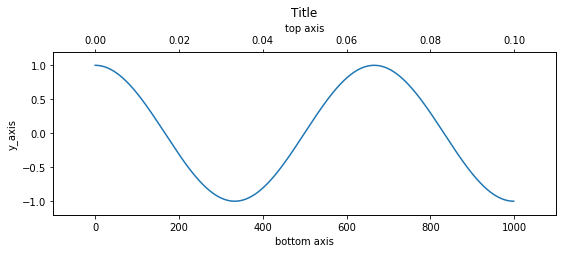

In [33]:
#Normal plot with matplotlib plot and setup_plot helper
setup_plot('Title', 'y_axis', 'bottom axis')
pl.plot(np.arange(1000), np.cos(np.linspace(0, 3*np.pi, 1000)));

#Add an extra x-axis at the top with 1e-4 scale
add_top_axis(np.arange(1000)*1e-4, 'top axis')

**Note the difference between linspace and arange:**

In [10]:
#Every second element from 0 upto (but excluding) 10
print(np.arange(0,10,2))

#5 elements from 0 upto (but excluding) 10
print(np.linspace(0,10,5,False))

#5 elements from 0 upto 10 (avoid!!!)
print(np.linspace(0,10,5))

[0 2 4 6 8]
[0. 2. 4. 6. 8.]
[ 0.   2.5  5.   7.5 10. ]


#### Audio player with Ipython.lib.display.Audio

In [4]:
example_signal = np.sin(2*np.pi*500*np.linspace(0,5,50000))
IPython.lib.display.Audio(rate=10000,
                          data=example_signal)

#### Plotting the spectrum of a signal

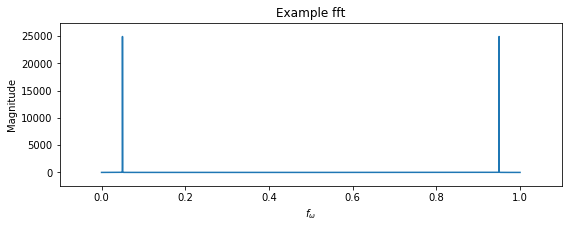

In [12]:
#Plotting the spectrum of a signal
example_fft = np.fft.fft(example_signal) 
example_fw_axis = np.linspace(0, 1, len(example_fft), False)

setup_plot('Example fft', 'Magnitude', '$f_\omega$')
pl.plot(example_fw_axis, np.abs(example_fft));

# Answer space:

# Question1:

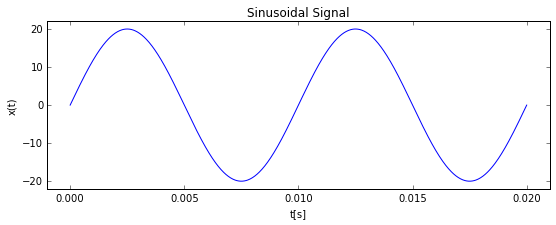

In [17]:
#1.1
t = np.linspace(0, 0.02,num=1000)
x = 20*np.sin(100*2*np.pi*t)
setup_plot('Sinusoidal Signal', 'x(t)', 't[s]')
pl.plot(t,x)

<Container object of 3 artists>

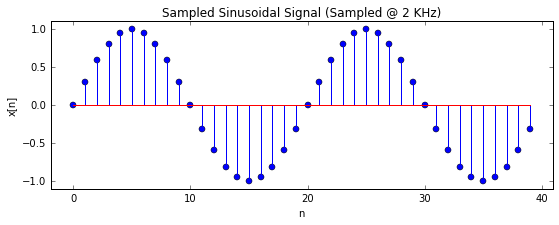

In [6]:
#1.2
fs = 2000
n = np.arange(0,40)
fw = 100/fs
xsamp = np.sin(2*fw*np.pi*n)
setup_plot('Sampled Sinusoidal Signal (Sampled @ 2 KHz)','x[n]','n')
pl.stem(n,xsamp)

<Container object of 3 artists>

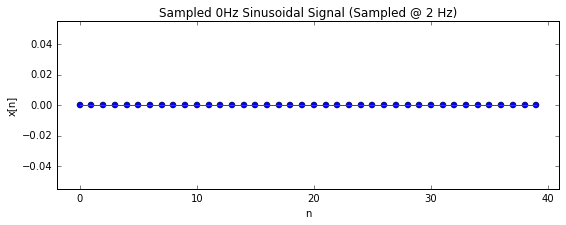

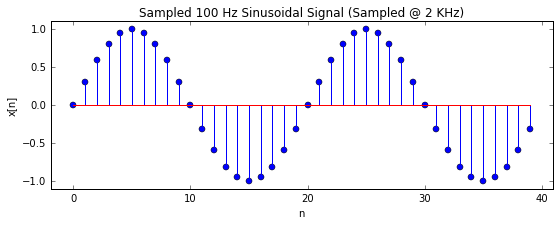

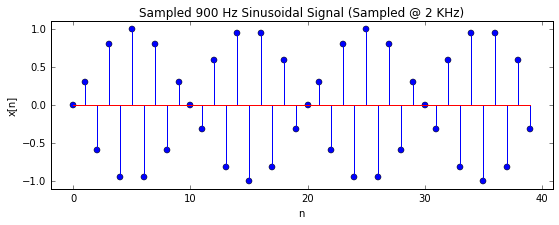

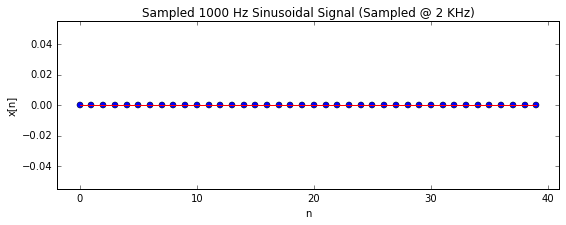

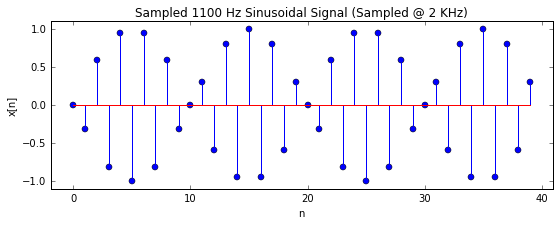

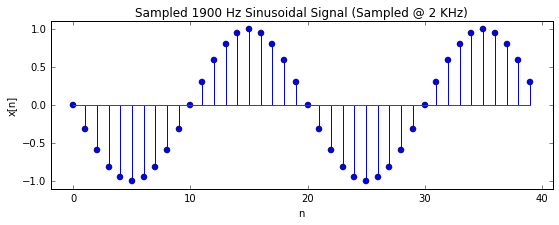

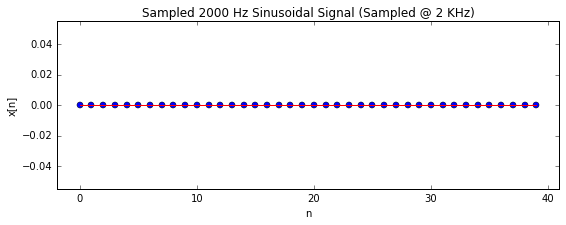

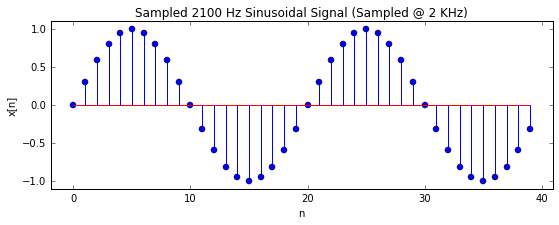

In [54]:
#1.3
xsamp1 = np.sin(2*(0)*np.pi*n)
setup_plot('Sampled 0Hz Sinusoidal Signal (Sampled @ 2 Hz)','x[n]','n')
pl.stem(n,xsamp1)

xsamp2 = np.sin(2*(100/2000)*np.pi*n)
setup_plot('Sampled 100 Hz Sinusoidal Signal (Sampled @ 2 KHz)','x[n]','n')
pl.stem(n,xsamp2)

xsamp3 = np.sin(2*(900/2000)*np.pi*n)
setup_plot('Sampled 900 Hz Sinusoidal Signal (Sampled @ 2 KHz)','x[n]','n')
pl.stem(n,xsamp3)

xsamp4 = np.sin(2*(1000/2000)*np.pi*n)
xsamp4[(xsamp4>-1e-10) * (xsamp4<1e-10)] = 0
setup_plot('Sampled 1000 Hz Sinusoidal Signal (Sampled @ 2 KHz)','x[n]','n')
pl.stem(n,xsamp4)

xsamp5 = np.sin(2*(1100/2000)*np.pi*n)
setup_plot('Sampled 1100 Hz Sinusoidal Signal (Sampled @ 2 KHz)','x[n]','n')
pl.stem(n,xsamp5)

xsamp6 = np.sin(2*(1900/2000)*np.pi*n)
setup_plot('Sampled 1900 Hz Sinusoidal Signal (Sampled @ 2 KHz)','x[n]','n')
pl.stem(n,xsamp6)

xsamp7 = np.sin(2*(2000/2000)*np.pi*n)
xsamp7[(xsamp7>-1e-10) * (xsamp7<1e-10)] = 0
setup_plot('Sampled 2000 Hz Sinusoidal Signal (Sampled @ 2 KHz)','x[n]','n')
pl.stem(n,xsamp7)

xsamp8 = np.sin(2*(2100/2000)*np.pi*n)
setup_plot('Sampled 2100 Hz Sinusoidal Signal (Sampled @ 2 KHz)','x[n]','n')
pl.stem(n,xsamp8)

1.4
I would count the number of samples per cycle.

# Question 2:

<Container object of 3 artists>

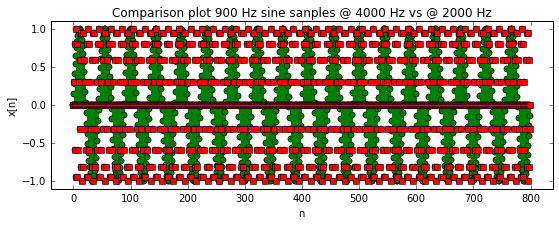

In [3]:
n2 = np.arange(0,800)
fs2 = 40000
x900 = np.sin(2*(900/fs2)*np.pi*n2)
xsamp900 = np.sin(2*(900/2000)*np.pi*n2)
setup_plot('Comparison plot 900 Hz sine sanples @ 4000 Hz vs @ 2000 Hz','x[n]','n')
pl.stem(n2,x900,'go-')
pl.stem(n2,xsamp900,'rs')

# Question 3:

<Container object of 3 artists>

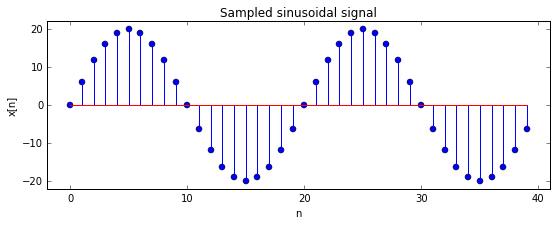

In [8]:
#3.1
xt = 10*np.sin(100*2*(1/2000)*np.pi*n)+ 10*np.sin(2100*2*(1/2000)*np.pi*n)
setup_plot('Sampled sinusoidal signal','x[n]','n')
pl.stem(n,xt)

I suspect that there is aliasing that ocurre. So there is distortion

<Container object of 3 artists>

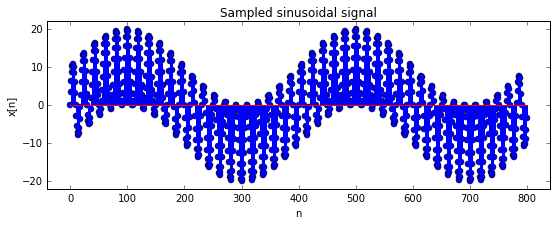

In [11]:
#3.2
xt = 10*np.sin(100*2*(1/40000)*np.pi*n2)+ 10*np.sin(2100*2*(1/40000)*np.pi*n2)
setup_plot('Sampled sinusoidal signal','x[n]','n')
pl.stem(n2,xt)

3.3) 1/100 and 1/900

3.4) Np = 20

3.5) 20 * 1/2000 = 0.01 = 10ms

3.6)Np=3.16

# Question 4:

In [ ]:
#4.1
